# **Clasificación espectral**

### **Construcción del diagrama HR**

Importar librerías necesarias y cargar csv.



In [29]:
%%capture
!pip install -r ../requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/Star99999_raw.csv')

Ver las columnas y una muestra de su contenido.

In [4]:
df.head(5)

,Unnamed: 0,Vmag,Plx,e_Plx,B-V,SpType
0,0,9.10,3.54,1.39,0.482,F5
1,1,9.27,21.90,3.10,0.999,K3V
2,2,6.61,2.81,0.63,-0.019,B9
3,3,8.06,7.75,0.97,0.370,F0V
4,4,8.55,2.87,1.11,0.902,G8III


***Significado de las columnas:***

*   **Vmag: magnitud aparente en el filtro V**
*   **Plx: paralaje (en miliarcsec)**
*   **e_Plx: error en el valor de paralaje (en miliarcsec)**
*   **B-V: diferencia entre la magnitud aparente en el filtro B y la magnitud aparente en el filtro V (índice de color)**
*   **SpType: tipo espectral**



```
# ¿Qué es la magnitud aparente?
# ¿Qué es el filtro V? ¿Qué es el filtro B? 
# ¿Qué es el índice de color? ¿Qué significa que tenga un valor bajo/alto?
# ¿Qué es el tipo espectral? ¿Cuáles son los principales tipos espectrales? ¿Cómo se asocian con el color?
# ¿Qué es la paralaje? ¿Cuál es la diferencia entre segundos de arco y mili segundos de arco?
```



Eliminar la columna 'Unnamed: 0'.

In [5]:
df = df.drop(columns = ['Unnamed: 0'])

Ver los distintos tipos espectrales (y la cantidad de estrellas de cada uno).

In [6]:
df['SpType'].value_counts()

K0             7355
G5             5370
F8             3839
A0             3817
G0             3762
               ... 
K3IV-V            1
A5Vms...          1
A4Ia              1
B8IV (p Si)       1
M2-M7E(S)         1
Name: SpType, Length: 3756, dtype: int64

*Hay 3756 tipos espectrales distintos en los datos. Para simplificar (y poder hacer grupos) se corta el tipo espectral y se deja únicamente la primera letra.*

In [7]:
def cortar_tipo_espectral(nombre):
  nombre = str(nombre)
  letra = nombre[0]
  return letra

In [8]:
df['SpType'] = df['SpType'].apply(cortar_tipo_espectral)

In [9]:
df['SpType'].value_counts()

K    26750
F    21799
G    19668
A    15403
B     9100
M     3992
n     2622
O      226
C      143
R       79
W       64
s       59
N       50
D       22
S       19
p        1
k        1
(        1
Name: SpType, dtype: int64

*Todavía hay tipos espectrales poco comunes, por lo cual se filtra para dejar únicamente los siete tipos básicos.*

In [10]:
df = df[df['SpType'].isin(['O', 'B', 'A', 'F', 'G', 'K', 'M'])].reset_index(drop=True)

Transformar paralaje de miliarcsec a arcsec. Filtrar para dejar únicamente los valores de paralaje (y error en paralaje) mayores que 0.

In [11]:
def convertir_plx(plx):
  try:
    plx = float(plx)
    plx = plx/1000
    return plx
  except:
    return -1

In [12]:
df['Plx'] = df['Plx'].apply(convertir_plx)

In [13]:
df = df[df['Plx']>0].reset_index(drop=True)

In [14]:
df['e_Plx'] = df['e_Plx'].apply(convertir_plx)

In [15]:
df = df[df['e_Plx']>0].reset_index(drop=True)

Filtrar para dejar únicamente las estrellas con error en su paralaje menor al 10% (del valor de paralaje).

In [16]:
df = df[df['e_Plx'] < 0.1*df['Plx']].reset_index(drop=True)

Calcular la distancia en pc.



```
# ¿Cómo se calcula la distancia a partir del valor de paralaje?
```



In [17]:
df['d_pc'] = 1/df['Plx']

In [ ]:
df.sample(5)

,Vmag,Plx,e_Plx,B-V,SpType,d_pc
16960,8.89,0.00979,0.00076,0.494,F,102.145046
13431,8.43,0.01201,0.00105,0.620,G,83.263947
13856,8.79,0.00824,0.00078,0.493,F,121.359223
7100,10.39,0.02160,0.00194,1.030,K,46.296296
7862,7.04,0.01914,0.00086,0.538,F,52.246604


Convertir la magnitud aparente y el índice de color a float.

In [18]:
df = df[pd.to_numeric(df['Vmag'], errors='coerce').notnull()].reset_index(drop=True)

In [19]:
df = df[pd.to_numeric(df['B-V'], errors='coerce').notnull()].reset_index(drop=True)

In [20]:
df['Vmag'] = df['Vmag'].astype('float')

In [21]:
df['B-V'] = df['B-V'].astype('float')

Calcular la magnitud absoluta.



```
# ¿Qué es la magnitud absoluta? ¿Cómo se calcula?
```



In [22]:
df['V_abs'] = df['Vmag']+5-(5*np.log10(df['d_pc']))

In [23]:
df.sample(5)

,Vmag,Plx,e_Plx,B-V,SpType,d_pc,V_abs
1722,12.15,0.10564,0.00300,1.719,K,9.466111,12.269142
14962,8.68,0.01958,0.00107,0.801,G,51.072523,5.139063
13276,5.89,0.00975,0.00061,1.000,K,102.564103,0.835023
7586,8.55,0.01407,0.00103,0.500,F,71.073205,4.291470
12196,7.63,0.01608,0.00070,0.502,F,62.189055,3.661430


#### Graficar el diagrama HR



```
# ¿Qué se representa en el diagrama HR?
```



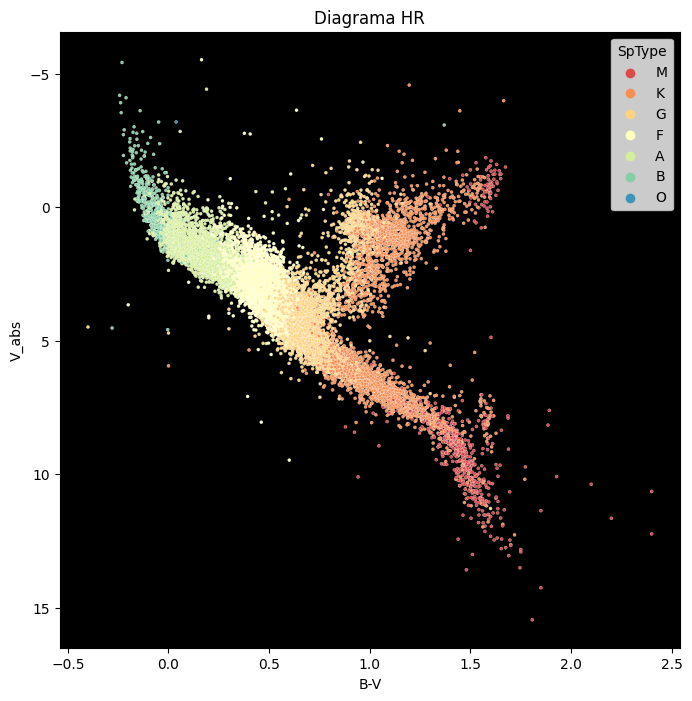

In [24]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(data=df, x='B-V', y='V_abs', hue='SpType', hue_order=['M', 'K', 'G', 'F', 'A', 'B', 'O'], palette='Spectral', s=5)
ax.invert_yaxis()
ax.set_facecolor('black')
plt.title('Diagrama HR')
plt.show()



```
# 1. ¿Cuáles regiones del diagrama HR pueden identificarse claramente en la imagen? ¿Cuáles no se ven?
# 2. ¿Por qué es necesario invertir el eje y?
# 3. ¿Cómo se relaciona el tipo espectral (y el índice de color) con la temperatura?
# 4. ¿Aproximadamente qué indice de color tiene el Sol? Justificar.
```



#### Cantidad de estrellas de cada tipo espectral

In [25]:
dict_sptype = dict(df['SpType'].value_counts())
sptype = list(dict_sptype.keys())
sptype_count = list(dict_sptype.values())

In [26]:
df_sptype = pd.DataFrame({'SpType':sptype, 'SpType_count':sptype_count})

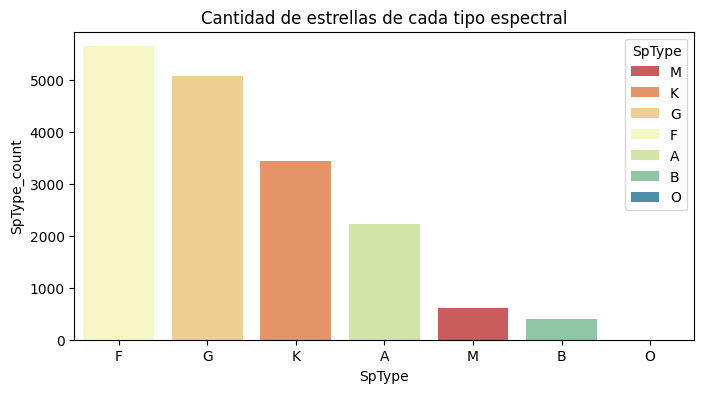

In [41]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df_sptype, x='SpType', y='SpType_count', hue='SpType', hue_order=['M', 'K', 'G', 'F', 'A', 'B', 'O'], palette='Spectral', dodge=False)
plt.title('Cantidad de estrellas de cada tipo espectral')
plt.show()



```
# ¿Por qué hay pocas estrellas O y B?
# ¿Por qué hay pocas estrellas M?
```



### **Predicción del tipo espectral**

#### Construcción del modelo

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [31]:
X = df[['B-V', 'V_abs']]
y = df['SpType']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [33]:
X_test_copy = X_test.copy()

In [34]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
error = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i*5)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

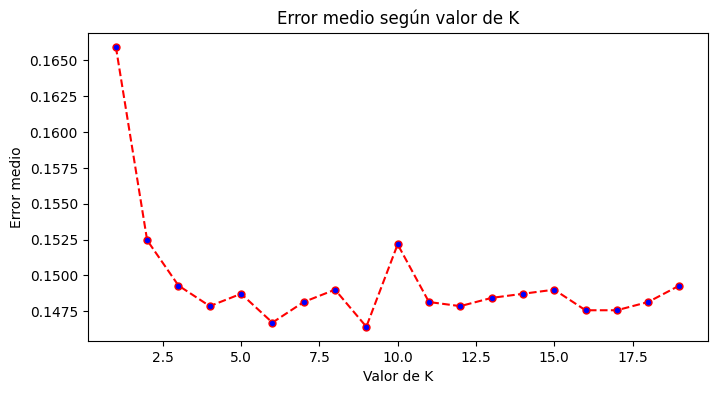

In [54]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=5)
plt.title('Error medio según valor de K')
plt.xlabel('Valor de K')
plt.ylabel('Error medio')
plt.show()

In [42]:
classifier = KNeighborsClassifier(n_neighbors=45)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=45)

#### Evaluación del modelo

In [43]:
y_pred = classifier.predict(X_test)

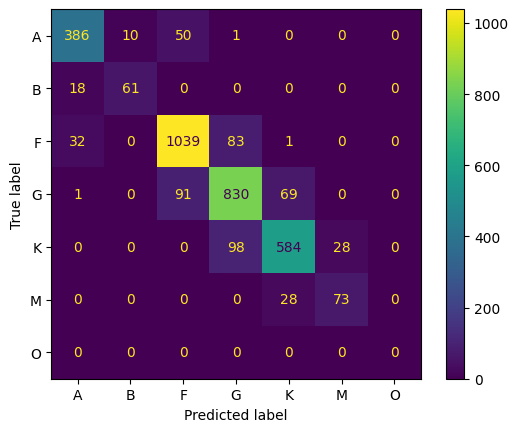

In [45]:
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

In [46]:
df_comparacion = pd.DataFrame({'B-V':X_test_copy['B-V'], 'V_abs':X_test_copy['V_abs'], 'True_SpType':y_test, 'Predicted_SpType':y_pred})

In [47]:
df_errores = df_comparacion[df_comparacion['True_SpType']!=df_comparacion['Predicted_SpType']]

In [48]:
df_errores.sample(5)

,B-V,V_abs,True_SpType,Predicted_SpType
7793,0.605,3.722954,F,G
1224,1.011,2.039456,G,K
400,0.886,5.789898,G,K
354,0.583,4.298915,F,G
5072,0.315,3.115023,A,F


In [49]:
porcentaje_error = (len(df_errores)/len(df_comparacion))*100

In [50]:
print(f'El {porcentaje_error: .0f}% de las estrellas fueron mal clasificadas usando este modelo.')

El  15% de las estrellas fueron mal clasificadas usando este modelo.


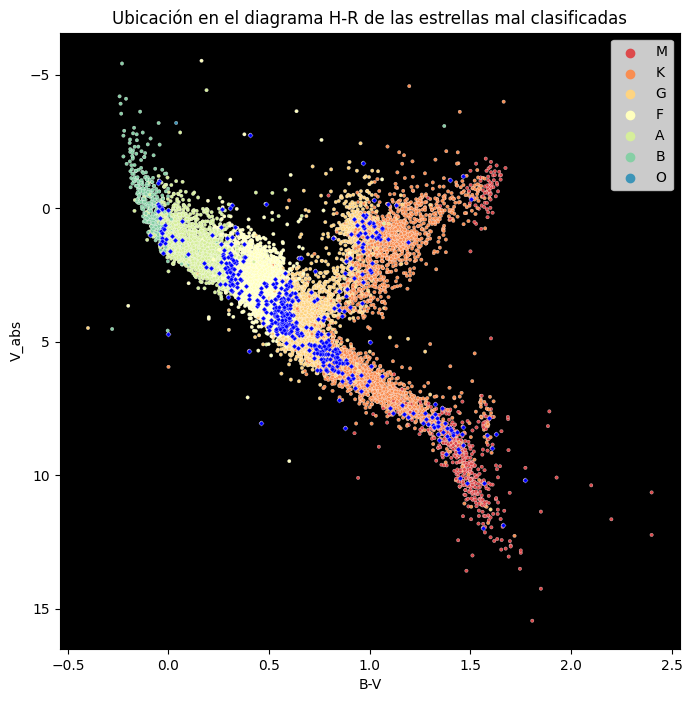

In [51]:
color = ['k']

fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=df, x='B-V', y='V_abs', hue='SpType', hue_order=['M', 'K', 'G', 'F', 'A', 'B', 'O'], palette='Spectral', s=6, ax=ax)
sns.scatterplot(data=df_errores, x='B-V', y='V_abs', color='blue', marker='D', s=7, ax=ax)
ax.invert_yaxis()
ax.set_facecolor('black')
plt.title('Ubicación en el diagrama H-R de las estrellas mal clasificadas')
plt.show()

In [52]:
tipos_espectrales = ['O', 'B', 'A', 'F', 'G', 'K', 'M']

n_anterior = 0  # Cantidad de veces que se predice un tipo anterior al real
n_posterior = 0   # Cantidad de veces que se predice un tipo posterior al real

for i in range(len(df_errores)):
  sp_type_pred = list(df_errores['Predicted_SpType'])[i]
  sp_type_pred_index = tipos_espectrales.index(sp_type_pred)
  sp_type_real = list(df_errores['True_SpType'])[i]
  sp_type_real_index = tipos_espectrales.index(sp_type_real)
  if sp_type_pred_index==0:
    if sp_type_real_index==sp_type_pred_index+1:
      n_anterior += 1
  elif sp_type_pred_index==len(tipos_espectrales)-1:
    if sp_type_real_index==sp_type_pred_index-1:
      n_posterior += 1
  else:
    if sp_type_real_index==sp_type_pred_index-1:
      n_posterior += 1
    elif sp_type_real_index==sp_type_pred_index+1:
      n_anterior += 1

In [53]:
print(f'El {(n_anterior*100)/len(df_errores): .1f}% de las veces se predijo un tipo espectral un lugar "anterior" (hacia temperaturas mayores) al real.')
print(f'El {(n_posterior*100)/len(df_errores): .1f}% de las veces se predijo un tipo espectral un lugar "posterior" (hacia temperaturas menores) al real.')
print(f'El {((len(df_errores)-n_anterior-n_posterior)*100)/len(df_errores): .1f}% de las veces se predijo un tipo espectral no adyacente al real.')

El  50.8% de las veces se predijo un tipo espectral un lugar "anterior" (hacia temperaturas mayores) al real.
El  48.6% de las veces se predijo un tipo espectral un lugar "posterior" (hacia temperaturas menores) al real.
El  0.6% de las veces se predijo un tipo espectral no adyacente al real.
